#Insurence cost prediction
source:
https://www.kaggle.com/mirichoi0218/insurance

In [2]:
d=spark.read.format('com.databricks.spark.csv').options(inferSchema="true",header="true",delimiter=',').load('/FileStore/tables/insurance.csv')
data=d


In [3]:
display(d)

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33.0,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692


In [4]:
import pyspark.sql.functions as F 
from pyspark.sql.types import IntegerType
categ = data.select('region').distinct().rdd.flatMap(lambda x:x).collect()
exprs = [F.when(F.col('region') == cat,1).otherwise(0)\
            .alias(str(cat)) for cat in categ]
data = data.select(exprs+data.columns)


def smoke(x):
  if x in ['yes']:
    return 1
  else:
    return 0
def sex(x):
  if x in ['female']:
    return 1
  else:
    return 0
udfsmoke=udf(smoke,IntegerType())
udfsex=udf(sex,IntegerType())
data=data.withColumn("smoker2",udfsmoke(data.smoker))
data=data.withColumn("sex2",udfsex(data.sex))

In [5]:
data=data.select("northwest","southwest","northeast","southeast","age","bmi","children","smoker2","sex2","charges")


In [6]:
from pyspark.mllib.stat import Statistics
import pandas as pd

# result can be used w/ seaborn's heatmap
def compute_correlation_matrix(df, method='pearson'):
    # wrapper around
    # https://forums.databricks.com/questions/3092/how-to-calculate-correlation-matrix-with-all-colum.html
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df
corr=compute_correlation_matrix(data)
display(corr)

northwest,southwest,northeast,southeast,age,bmi,children,smoker2,sex2,charges
1.0,-0.32082922013820336,-0.32017726125388934,-0.3462646614073315,-4.074233732771156E-4,-0.135995523711327,0.02480612931194749,-0.03694547401760744,0.011155728009853877,-0.03990486404043807
-0.32082922013820336,1.0,-0.32017726125388934,-0.3462646614073315,0.01001623421140657,-0.006205183019341958,0.021913576170687676,-0.03694547401760744,0.004184049318969017,-0.04321002899168454
-0.32017726125388934,-0.32017726125388934,1.0,-0.34556101501804287,0.002474954511076306,-0.1381562239359187,-0.02280759844488695,0.002811134820450954,0.0024254321123319384,0.006348771280155927
-0.3462646614073315,-0.3462646614073315,-0.34556101501804287,1.0,-0.01164194061722785,0.2700246490284696,-0.02306574800575065,0.06849841031175362,-0.017116875189056652,0.07398155156576003
-4.074233732771156E-4,0.01001623421140657,0.002474954511076306,-0.01164194061722785,1.0,0.10927188154853844,0.04246899855885192,-0.02501875153628377,0.020855872182864953,0.29900819333064643
-0.135995523711327,-0.006205183019341958,-0.1381562239359187,0.2700246490284696,0.10927188154853844,1.0,0.012758900820679847,0.0037504259049834193,-0.046371150646285476,0.1983409688336226
0.02480612931194749,0.021913576170687676,-0.02280759844488695,-0.02306574800575065,0.04246899855885192,0.012758900820679847,1.0,0.007673120307711251,-0.017162977748757195,0.06799822684790517
-0.03694547401760744,-0.03694547401760744,0.002811134820450954,0.06849841031175362,-0.02501875153628377,0.0037504259049834193,0.007673120307711251,1.0,-0.07618481692109512,0.7872514304984766
0.011155728009853877,0.004184049318969017,0.0024254321123319384,-0.017116875189056652,0.020855872182864953,-0.046371150646285476,-0.017162977748757195,-0.07618481692109512,1.0,-0.05729206220202604
-0.03990486404043807,-0.04321002899168454,0.006348771280155927,0.07398155156576003,0.29900819333064643,0.1983409688336226,0.06799822684790517,0.7872514304984766,-0.05729206220202604,1.0


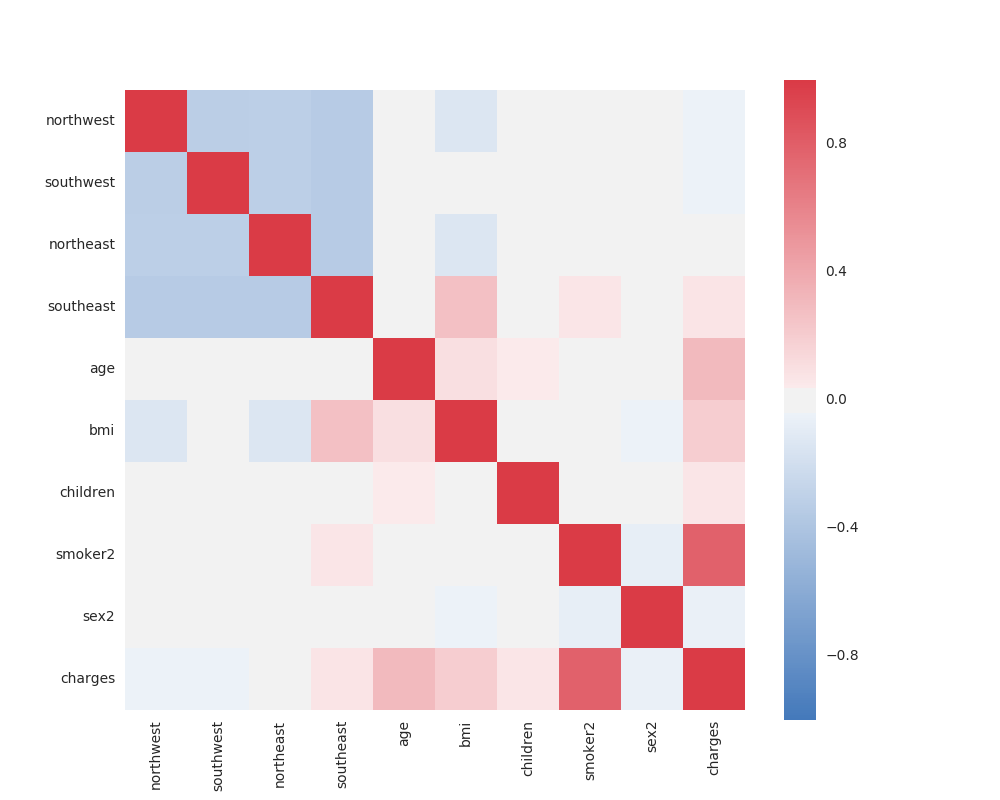

In [7]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
f, ax = pl.subplots(figsize=(10, 8))

p=sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250,10,as_cmap=True),
            square=True, ax=ax)
display(p.figure)

In [8]:
def howold(x):
  if x<24:
    return "<24"
  elif x<30:
    return "24-30"
  elif x<40:
    return "30-40"
  elif x<50:
    return "40-50"
  elif x<=60:
    return "50-60"
  else:
    return ">60"

def bmilevel(x):
  if x<18.5:
    return "niedowaga"
  elif x<25:
    return "waga normalna"
  elif x<30:
    return "nadwaga"
  else:
    return "otyłość"

from pyspark.sql.types import StringType
udfhowold=udf(howold,StringType())
udfbmilevel=udf(bmilevel,StringType())

In [9]:
d=d.withColumn("age2",udfhowold(d.age))
d=d.withColumn("bmilevel",udfbmilevel(d.bmi))
display(d)

age,sex,bmi,children,smoker,region,charges,age2,bmilevel
19,female,27.9,0,yes,southwest,16884.924,<24,nadwaga
18,male,33.77,1,no,southeast,1725.5523,<24,otyłość
28,male,33.0,3,no,southeast,4449.462,24-30,otyłość
33,male,22.705,0,no,northwest,21984.47061,30-40,waga normalna
32,male,28.88,0,no,northwest,3866.8552,30-40,nadwaga
31,female,25.74,0,no,southeast,3756.6216,30-40,nadwaga
46,female,33.44,1,no,southeast,8240.5896,40-50,otyłość
37,female,27.74,3,no,northwest,7281.5056,30-40,nadwaga
37,male,29.83,2,no,northeast,6406.4107,30-40,nadwaga
60,female,25.84,0,no,northwest,28923.13692,50-60,nadwaga


In [10]:
d.select("sex","charges").groupBy("sex").avg("charges").show()
d.select("smoker","charges").groupBy("smoker").avg("charges").show()
d.select("region","charges").groupBy("region").avg("charges").show()
d.select("children","charges").groupBy("children").avg("charges").show()
d.select("bmilevel","charges").groupBy("bmilevel").avg("charges").show()
d.select("age2","charges").groupBy("age2").avg("charges").show()

+------+------------------+
 sex| avg(charges)|
+------+------------------+
female| 12569.57884383534|
 male|13956.751177721886|
+------+------------------+

+------+-----------------+
smoker| avg(charges)|
+------+-----------------+
 no|8434.268297856199|
 yes|32050.23183153285|
+------+-----------------+

+---------+------------------+
 region| avg(charges)|
+---------+------------------+
northwest|12417.575373969228|
southeast|14735.411437609895|
northeast| 13406.3845163858|
southwest| 12346.93737729231|
+---------+------------------+

+--------+------------------+
children| avg(charges)|
+--------+------------------+
 1|12731.171831635793|
 3| 15355.31836681528|
 5| 8786.035247222222|
 4|13850.656311199999|
 2|15073.563733958328|
 0|12365.975601635882|
+--------+------------------+

+-------------+------------------+
 bmilevel| avg(charges)|
+-------------+------------------+
 niedowaga| 8852.200585000002|
 nadwaga|10987.509891318654|
waga normalna|10409.337708977779|
 otyłość|15552.335468868452|
+-------------+------------------+

+-----+------------------+
 age2| avg(charges)|
+-----+------------------+
40-50|14399.203563870966|
 <24| 8828.032645116|
50-60| 16924.26761183673|
30-40|11738.784117354091|
 >60|21063.163397912085|
24-30| 9713.107604251503|
+-----+------------------+

In [11]:
d.select("smoker","charges").groupBy("smoker").avg("charges").show()

+------+-----------------+
smoker| avg(charges)|
+------+-----------------+
 no|8434.268297856199|
 yes|32050.23183153285|
+------+-----------------+